In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

In [76]:
nQubit =8
dev = qml.device("default.qubit", wires=nQubit)
wires =  range(nQubit)

## First step: Encoding 
We want to encod a superposition of the form
$$
|\phi\rangle = \frac{1}{\sqrt{m}}(|x_1\rangle+|x_2\rangle + \cdots + |x_m\rangle ),
$$
where $x_i$'s are integers. For example: $\frac{1}{\sqrt{4}}(|1\rangle+|3\rangle + |5\rangle +|7\rangle )$ in a three qubit system. 

The following function takes the integers $x_1, ..., x_m$ and returns a circuit for preparing the above superposition. 

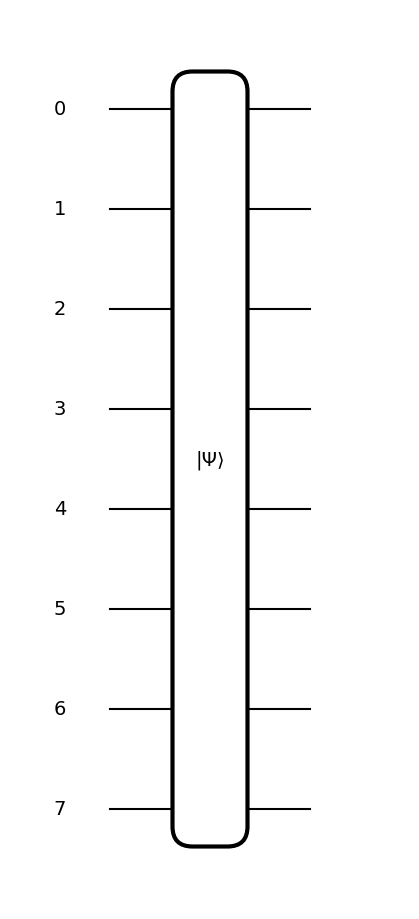

In [77]:
def encoding(superposition):
    a = np.zeros(2**nQubit)
    for i in superposition:
        a[i]=1/np.sqrt(superposition.size)
    qml.AmplitudeEmbedding(features=a, wires=wires)

superposition = np.array([1,3,5,7])
qml.draw_mpl(encoding, show_all_wires=True)(superposition)
plt.show()

## Second step: QFT
Now we take the QFT of the prepared state. 

(<Figure size 700x900 with 1 Axes>, <Axes: >)

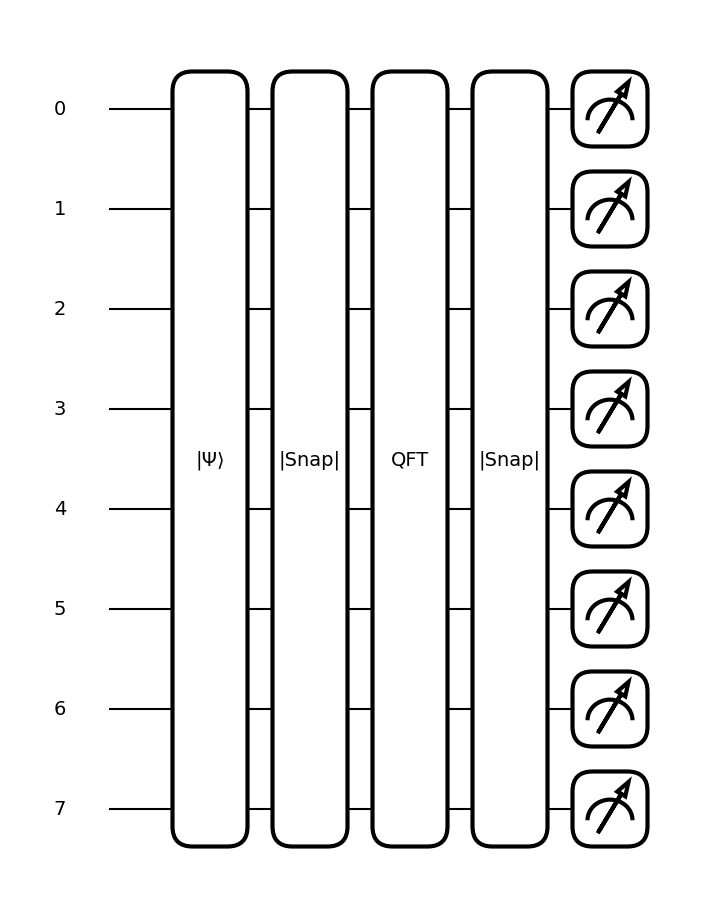

In [78]:
@qml.qnode(dev)
def circuit(superposition):
    encoding(superposition)
    qml.Snapshot("Initial state")
    qml.QFT(wires=wires)
    qml.Snapshot("After QFT")
    return  qml.probs(wires=wires) 

qml.draw_mpl(circuit, show_all_wires=True)(superposition)

## Showing the amplitudes:
We use "snapshots" to show the amplitudes before and after the QFT operattion:

q/r= 64.0 
 [  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212
 216 220 224 228 232 236 240 244 248 252]


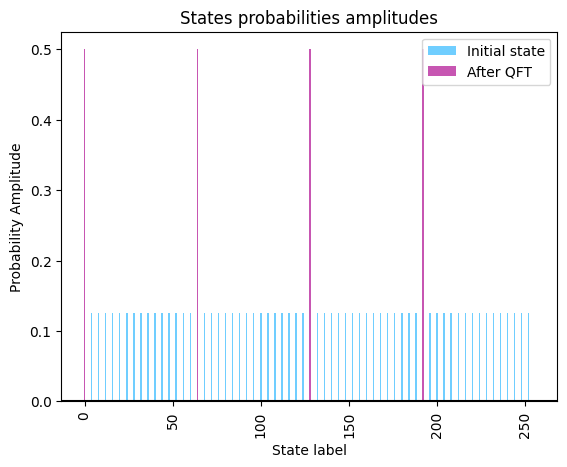

In [82]:
q = 2**nQubit
r=4
s =0
superposition = np.array(range(s,q-1, r))
print("q/r=", q/r,"\n", superposition)


results = qml.snapshots(circuit)(superposition)

y1 = np.real(results["Initial state"])    
y2 = np.real(results["After QFT"])

plt.bar(range(len(y1)), y1, color = "#70CEFF")
plt.bar(range(len(y1)), y2, color = "#C756B2")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")

plt.legend(["Initial state", "After QFT"])
plt.axhline(y=0.0, color="k", linestyle="-")
plt.show()

In [84]:
print(superposition.len())

AttributeError: 'numpy.ndarray' object has no attribute 'len'